In [ ]:
from decimal import Decimal
import decimal

from fimdp.consMDP import ConsMDP
from fimdp.products import product_energy

# Explicit representation of energy level in state-space

The goal of this notebook is to show the impact on state-space size if we encode the information about energy levels directly in the state-space. We first need a function, that does this encoding. 

Let's create a CMDP, we will use the following function for easier definitions of actions using uniform distributions.

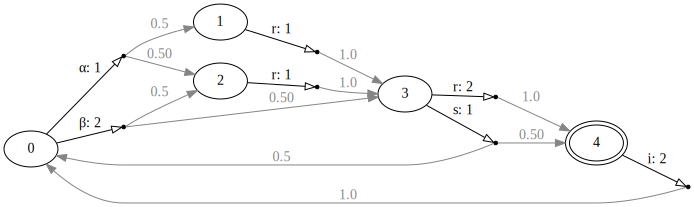

In [2]:
from fimdp.examples.reachability_examples import explicit
mdp, T = explicit(); mdp

## Product of CMDP and energy counter

The state-space of the newly created MDP consists of tuples $(s, e)$, where $s$ is the state of the input CMDP and $e$ is the energy level. For a tuple-state $(s,e)$ and an action $a$ with consumption (in the input CMDP) $c$, all successors of the action $a$ in the new MDP are of the form $(s', e-c)$ for non-reload states and $(r,\mathsf{cap})$ for reload states.

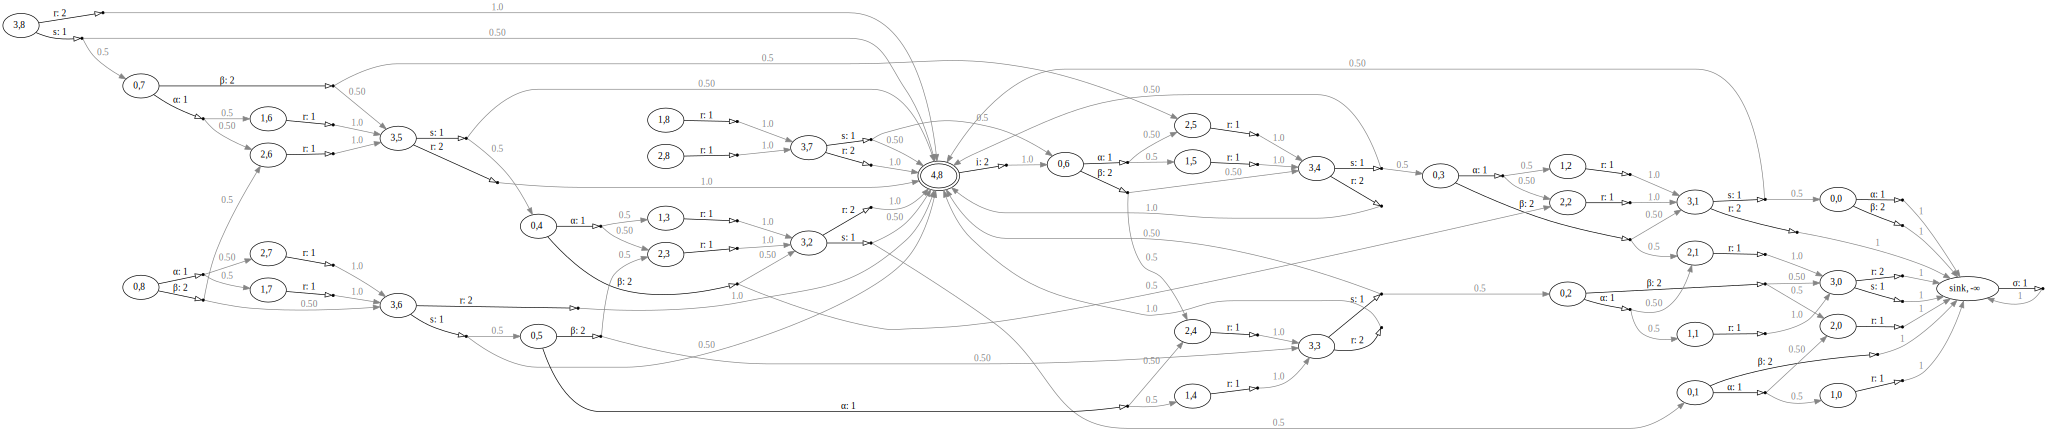

In [5]:
p, pT = product_energy(mdp, 8, T)
p

Check if the computed values make at least some sense.

In [10]:
cons_res = mdp.get_almostSureReachability(T, 8)
exp_res = p.get_almostSureReachability(pT, 8)
for s in range(mdp.num_states):
    assert cons_res[s] == exp_res[s]

In [12]:
assert p.num_states == 38